Import necessary libraries and functions.

In [37]:
import numpy as np, cmath,scipy as sp
import scipy.io
from matplotlib import pyplot as plt

from numpy import pi, sin, cos, exp, sqrt, log, log10, random, angle  #import basic functions from numpy that we'll need
from numpy.fft import fft, ifft

%matplotlib inline

Import optional library for prettier plots.

In [38]:
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

###Figure 13.1

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


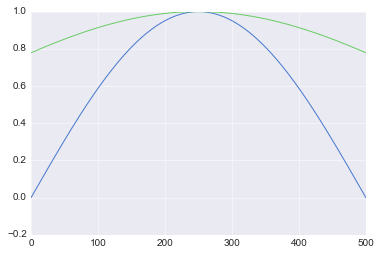

In [39]:
#  Testing
# wavelet_ = exp(1j * time) * exp(-time**2) #multiple complex sinewave by gaussian to make morlet wavelet
plt.plot(exp(1j * pi * time))
plt.plot(exp(-time**2))

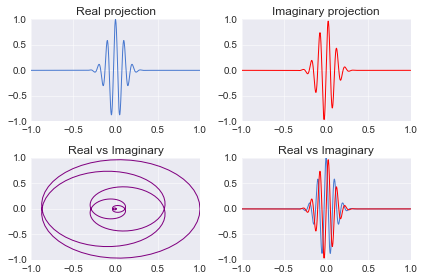

In [40]:
#parameters

srate = 500. #sampling rate in Hz
f = 10. #frequency of wavelet in Hz
time = np.arange(-1,1+1/srate,1/srate)

s = 6/(2*pi*f) # standard deviation for wavelet

wavelet = exp(2*pi*1j*f*time) * exp(-time**2/(2*s**2)) #multiple complex sinewave by gaussian to make morlet wavelet


plt.subplot(221)
plt.plot(time,np.real(wavelet))
plt.xlim([-1,1])
plt.title("Real projection")


plt.subplot(222)
plt.plot(time,np.imag(wavelet),'r')
plt.xlim([-1,1])
plt.title("Imaginary projection")


plt.subplot(223)
plt.plot(np.real(wavelet),np.imag(wavelet),'purple')
plt.title("Real vs Imaginary")

plt.subplot(224)
plt.plot(time,np.real(wavelet))
plt.plot(time,np.imag(wavelet),'r')
plt.xlim([-1,1])
plt.title("Real vs Imaginary")

plt.tight_layout()

###Figure 13.2

In [41]:
np.real(wavelet).shape, np.imag(wavelet).shape, time.shape

((1001,), (1001,), (1001,))

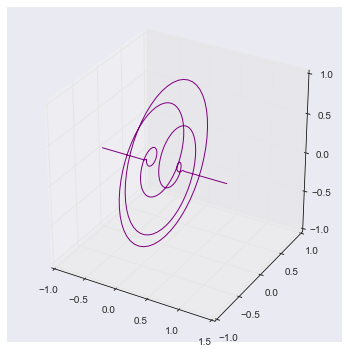

In [42]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs=time, ys=np.real(wavelet), zs=np.imag(wavelet),color='purple')

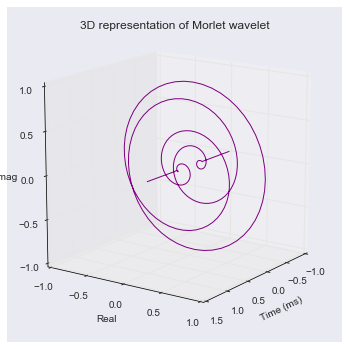

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')
ax.plot(xs=time, ys=np.real(wavelet), zs=np.imag(wavelet),color='purple')
ax.view_init(15,35)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Real')
ax.set_zlabel('Imag')
plt.title("3D representation of Morlet wavelet")

###movie
This block plots live figures

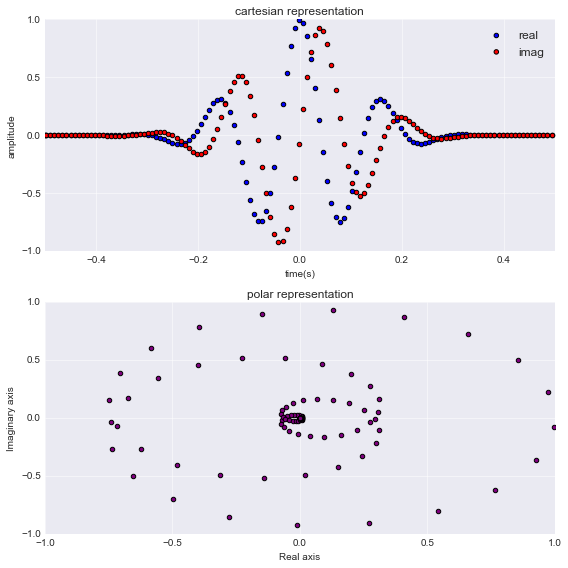

In [44]:
from IPython import display

frequency = 6. #frequency of sine wave
srate = 500. 
time = np.arange(-.5,0.5+1/srate,1/srate)


#create the complex wavelet
wavelet = exp(2*1j*pi*frequency*time) * exp(-time**2/(2*(4/(2*pi*frequency))**2))

f, axes = plt.subplots(2, 1)
f.set_size_inches(8, 8)


#set up top row of data (real and imaginary in cartesian plot)
cplotR = axes[0].scatter(time[0],np.real(wavelet[0]),c='b')
cplotI = axes[0].scatter(time[0],np.imag(wavelet[0]),c='r')
axes[0].axis([time[0],time[-1],-1,1])

axes[0].set_title("cartesian representation")
axes[0].set_ylabel("amplitude")
axes[0].set_xlabel("time(s)")
axes[0].legend(["real","imag"])


#set up bottom row of data (polar presentation)
pplot = axes[1].scatter(np.real(wavelet[0]),np.imag(wavelet[0]),c='purple')
plt.axis([-1,1,-1,1])
plt.xlabel("Real axis")
plt.ylabel("Imaginary axis")
plt.title("polar representation")
plt.tight_layout()


timeskip = 4 #if computer is slow, change this to higher number

for ti in np.arange(1,len(time),timeskip):
    try:
       
        display.clear_output(wait=True)
                
        
        #update cartesian plots
        axes[0].scatter(time[ti],np.real(wavelet[ti]),c='b')
        axes[0].scatter(time[ti],np.imag(wavelet[ti]),c='r')
        
        #update polar plot
        axes[1].scatter(np.real(wavelet[ti]),np.imag(wavelet[ti]),c='purple')

        display.display(plt.gcf())

    except Exception as e:   
        break
        
f.clear()


###Figure 13.4

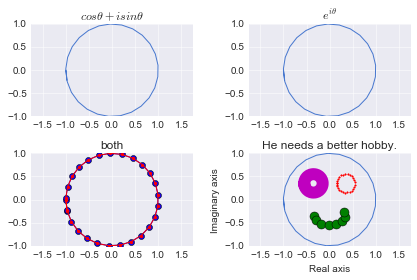

In [45]:
time = np.arange(-pi,pi+.25,.25)

plt.subplot(221)
plt.plot(np.real(cos(time) + 1j*sin(time)),np.imag(cos(time) + 1j*sin(time)))
_=plt.axis("equal")
plt.title(r"$cos\theta + i sin\theta$")

#Using Euler's formula
plt.subplot(222)
plt.plot(np.real(exp(1j*time)),np.imag(exp(1j*time)))
_=plt.axis("equal")
plt.title(r"$e^{i\theta}$")

plt.subplot(223)
plt.plot(np.real(cos(time) + 1j*sin(time)),np.imag(cos(time) + 1j*sin(time)),'bo-')
plt.plot(np.real(exp(1j*time)),np.imag(exp(1j*time)),'r.-')
plt.title("both")
plt.axis("equal")


plt.subplot(224)
face = cos(time)+1j*sin(time)
plt.plot(np.real(face),np.imag(face)) #plot face
leftEye = (-.35+cos(time)/5) + 1j*(.35+sin(time)/5)
plt.plot( np.real(leftEye),np.imag(leftEye),'m',linewidth = 12) #left eye
rightEye = (+.35+cos(time)/5) + 1j*(.35+sin(time)/5)
plt.plot(np.real(rightEye),np.imag(rightEye)  ,'r.',markersize=3) #right eye
smile = np.arange(-pi,0+0.5,0.5)
mouth = (cos(smile)/3) + 1j*(-.35+sin(smile)/5)
plt.plot(np.real(mouth),np.imag(mouth)  ,'go',markersize=9) #mouth
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.axis("equal")
plt.title('He needs a better hobby.')

plt.tight_layout()

###Figure 13.5

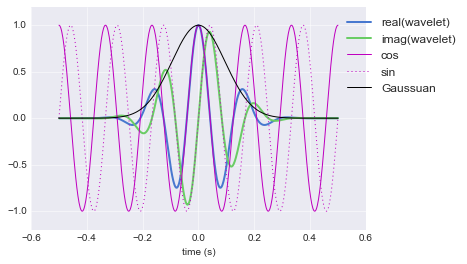

In [46]:
time = np.arange(-.5,.5+1/srate,1/srate)

#plot real and imaginary parts of wavelet

plt.plot(time,np.real(wavelet),linewidth = 2)
plt.plot(time,np.imag(wavelet),linewidth = 2)

#plot cosine and sine

plt.plot(time,cos(2*pi*frequency*time),'m')
plt.plot(time,sin(2*pi*frequency*time),'m:')

#plot gaussian window

gaus_win = exp(-time**2/(2*s**2))
plt.plot(time,gaus_win,'k')
plt.ylim([-1.2,1.2])
plt.xlabel("time (s)")
plt.legend(["real(wavelet)","imag(wavelet)","cos","sin","Gaussuan"], bbox_to_anchor = [1.3, 1])


###Figure 13.6

In [47]:
data = scipy.io.loadmat('sampleEEGdata')
EEGdata = data["EEG"][0,0]["data"]
EEGpnts = data["EEG"][0,0]["pnts"][0,0] #number of points in EEG data
EEGtimes = data["EEG"][0,0]["times"][0]
EEGsrate = float(data["EEG"][0,0]["srate"][0]) #make float for division purposes later
EEGtrials = data["EEG"][0,0]["trials"][0,0]

EEGchanlocslabels=data["EEG"][0,0]["chanlocs"][0]["labels"]

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


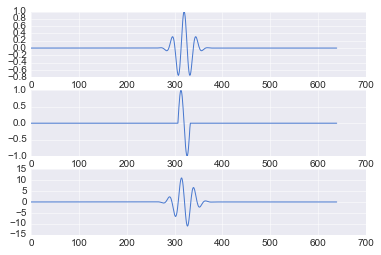

In [48]:
time = np.arange( -1*EEGpnts/EEGsrate/2., EEGpnts/EEGsrate/2. , 1/EEGsrate)
f = 10. #frequency in Hz
s = 4/(2*pi*f)
wavelet = exp(1j*2*pi*f*time) * exp(-time **2 /(2*s**2))

#signal is one sine cycle
timeS = np.arange(0,1/f,1/EEGsrate)
signal = sin(2*pi*f*timeS)

#zero-pad the signal
zz= np.zeros(EEGpnts/2 - len(timeS)/2)
signal = np.concatenate([zz,signal,zz])


plt.subplot(311)
plt.plot(np.real(wavelet))

plt.subplot(312)
plt.plot(signal)

plt.subplot(313)
_=plt.plot(np.real(np.convolve(wavelet,signal,mode="same")))

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  import sys
/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


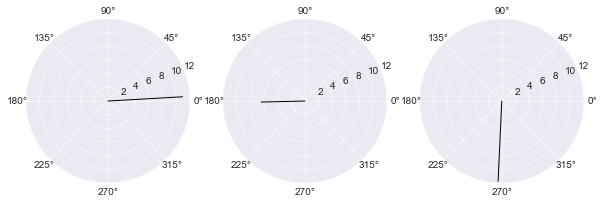

In [49]:
#now plot dot products at selected phase lags, corresponding to the above 3 plots

fig, axarr = plt.subplots(1, 3, subplot_kw=dict(polar=True))
fig.set_size_inches(10, 10.5)

axarr[0].plot(0,12,'-k')
dp = np.sum(wavelet[np.round(100/f)-3:]*signal[:-np.round(100/f)+3])
axarr[0].plot([angle(dp),angle(dp)],[0,np.abs(dp)],'-k')

axarr[1].plot(0,12,'-k')
dp = np.sum(wavelet[2.3*np.round(100/f)-3:]*signal[:-np.round(2.3*(100/f))+3])
axarr[1].plot([angle(dp),angle(dp)],[0,np.abs(dp)],'-k')

axarr[2].plot(0,12,'-k')
dp = np.sum(wavelet*signal);
_=axarr[2].plot([angle(dp),angle(dp)],[0,np.abs(dp)],'-k')

###Figure 13.8

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


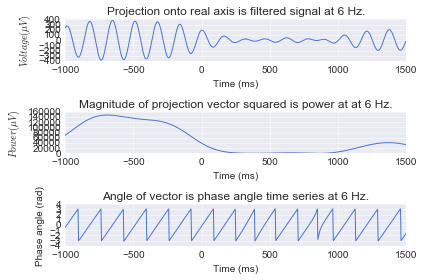

In [52]:
frequency = 6 #in Hz
time = np.arange(-1,1 + 1/EEGsrate,1/EEGsrate)
s = (4/(2*pi*frequency))**2 #s squared here rather than next line
wavelet = exp(2*1j*pi*frequency*time) * exp(-time**2./(2*s)/frequency)

#fft parameters
n_wavelet = len(wavelet)
n_data = EEGpnts
n_convolution = n_wavelet + n_data-1
half_of_wavelet_size = (len(wavelet)-1)/2.

#fft of wavelet and eeg data
fft_wavelet = fft(wavelet,n_convolution)
fft_data = fft(np.squeeze(EEGdata[46,:,0]),n_convolution)# FCz, trial 1

convolution_result_fft = ifft(fft_wavelet*fft_data,n_convolution)

#cut off edges
convolution_result_fft = convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size]

#plot for comparison
plt.subplot(311)
plt.plot(EEGtimes,np.real(convolution_result_fft))
plt.xlabel('Time (ms)')
plt.ylabel(r'$Voltage (\mu V)$')
plt.title( 'Projection onto real axis is filtered signal at ' + str(frequency) + ' Hz.' )

plt.subplot(312)
plt.plot(EEGtimes,np.absolute(convolution_result_fft)**2)
plt.xlabel('Time (ms)')
plt.ylabel(r'$Power (\mu V)$')
plt.title( 'Magnitude of projection vector squared is power at at ' + str(frequency) + ' Hz.' )

plt.subplot(313)
plt.plot(EEGtimes,angle(convolution_result_fft))
plt.xlabel('Time (ms)')
plt.ylabel('Phase angle (rad)')
plt.title( 'Angle of vector is phase angle time series at ' + str(frequency) + ' Hz.' )

plt.tight_layout()

In [59]:
frequency = 6 #in Hz
time = np.arange(-1,1 + 1/EEGsrate,1/EEGsrate)
s = (4/(2*pi*frequency))**2 #s squared here rather than next line
wavelet = exp(2*1j*pi*frequency*time) * exp(-time**2./(2*s)/frequency)
data = EEGdata[46,:,0]

convolution_result = np.convolve(a=data, mode='same', v=wavelet)

In [62]:
convolution_result.shape, convolution_result_fft.shape, data.shape, wavelet.shape

((640,), (640,), (640,), (513,))

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


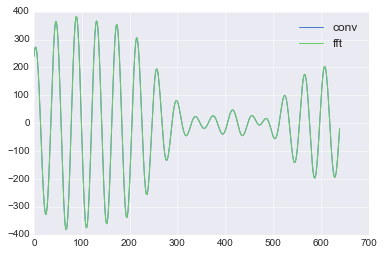

In [66]:
plt.plot(convolution_result, label='conv')
plt.plot(convolution_result_fft, label='fft')
plt.legend()

###Figure 13.9

In [67]:
EEGtimes.shape, np.real(convolution_result_fft).shape, np.imag(convolution_result_fft).shape

((640,), (640,), (640,))

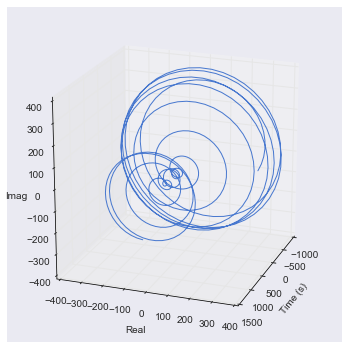

In [68]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(EEGtimes,np.real(convolution_result_fft),np.imag(convolution_result_fft))
ax.view_init(20, 20)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Real')
ax.set_zlabel('Imag')
plt.title("")

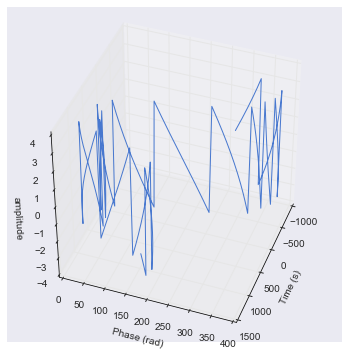

In [69]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(EEGtimes,np.absolute(convolution_result_fft),angle(convolution_result_fft))
ax.view_init(40, 20)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Phase (rad)')
ax.set_zlabel('amplitude')


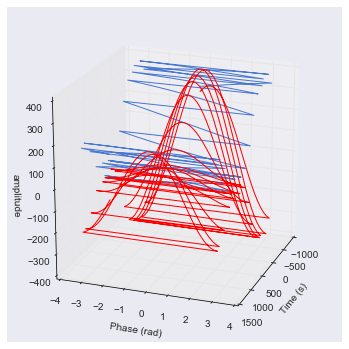

In [70]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(EEGtimes,angle(convolution_result_fft),np.absolute(convolution_result_fft))
ax.plot(EEGtimes,angle(convolution_result_fft),np.real(convolution_result_fft),'r')

ax.view_init(20, 20)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Phase (rad)')
ax.set_zlabel('amplitude')

###Figure 13.10

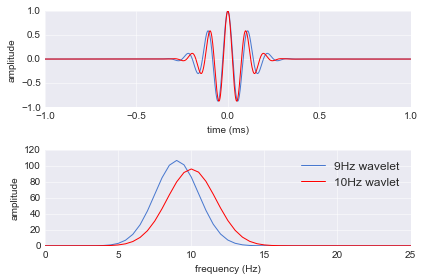

In [72]:
srate = 400.
time = np.arange(-1,1 + 1/srate, 1/srate)

#create 9Hz wavelet
f = 9 #frequency of wavelet in Hz
s = 6/(2*pi*f)
wavelet9 = exp(2*pi*1j*f*time) * exp(-time **2 /(2*s**2))


#create 10Hz wavelet
f = 10 #frequency of wavelet in Hz
s = 6/(2*pi*f)
wavelet10 = exp(2*pi*1j*f*time) * exp(-time **2 /(2*s**2))

plt.subplot(211)
plt.plot(time,np.real(wavelet9))
plt.plot(time,np.real(wavelet10),'r')
plt.xlabel("time (ms)")
plt.ylabel("amplitude")

plt.subplot(212)

hz = np.linspace(0,srate/2,np.floor(len(time)/2.)+1);
fft9 = fft(wavelet9)
fft10 = fft(wavelet10)

plt.plot(hz,np.absolute(fft9[:len(hz)]))
plt.plot(hz,np.absolute(fft10[:len(hz)]),'r')

plt.xlim([0,25])
plt.xlabel("frequency (Hz)")
plt.ylabel("amplitude")
plt.legend(["9Hz wavelet","10Hz wavlet"])
plt.tight_layout()

###Figure 13.11

VERY IMPORTANT:
Matlab and Python reshape matrices differently, in that Matlab uses Fortran (F-style) ordering, and Python uses C-style ordering. We must specify this when we use reshape! 

In [76]:
def nextpow2(i):
    n = 1
    while n < i: n *= 2
    return n

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/ipykernel_launcher.py:53: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


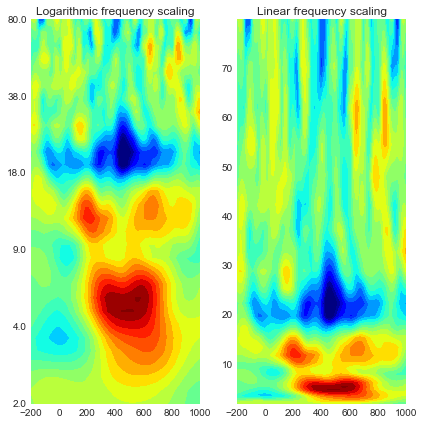

In [80]:
#definitions, selections...

chan2use = "FCz"
min_freq = 2
max_freq = 80
num_frex = 30

#define wavelet parameters
time = np.arange(-1,1+1/EEGsrate,1/EEGsrate)
frex = np.logspace(log10(min_freq),log10(max_freq),num_frex)
s    = np.logspace(log10(3),log10(10),num_frex)/(2*pi*frex)

#use the following lines to reproduce figure 13.14
# s =  3./(2*pi*frex)
# s = 10./(2*pi*frex)

# define convolution parameters
n_wavelet = len(time)
n_data = EEGpnts*EEGtrials
n_convolution = n_wavelet + n_data - 1
n_conv_pow2 = nextpow2(n_convolution)
half_of_wavelet_size = (n_wavelet-1)/2


selectedChannel =  EEGchanlocslabels  == chan2use #specify index (channel number) of label 

#get FFT of data
eegfft = fft(np.reshape(EEGdata[selectedChannel,:,:],[EEGpnts*EEGtrials],order="F"),n_conv_pow2)


# MATLAB: baseidx = dsearachn(EEGtimes)#
#python has no dsearchn() function, but since this is only a 1-D array, we can make a simple one ourselves

def closest(X, p):
    disp = X - p
    return np.argmin((disp*disp))


baseidx = [closest(EEGtimes,x) for x in [-500,-200]]


#initialize
eegpower = np.zeros([num_frex,EEGpnts]) #frequencies x time x trials
for fi in range(num_frex):
    
    #take the fft of the wavelet
    wavelet = fft(np.sqrt(1/(s[fi]*np.sqrt(pi))) * exp(2*1j*pi*frex[fi]*time) * exp(-time**2/(2*(s[fi]**2))),
                  n_conv_pow2)

    #convolution 
    eegconv = ifft(wavelet*eegfft) #convolution theorem
    eegconv = eegconv[:n_convolution]
    eegconv = eegconv[half_of_wavelet_size:-half_of_wavelet_size]
    
    #average power over trials
    #this performs baseline transform, which is covered in more depth in ch18
    
    temppower = np.mean(np.absolute(np.reshape(eegconv,[EEGpnts,EEGtrials],order="F"))**2,axis=1)
    eegpower[fi,:] = 10*log10(temppower/np.mean(temppower[baseidx[0]:baseidx[1]]))
    
    
plt.figure(figsize=[6,6])
ax1=plt.subplot(121)
ax1.set_yscale("log")
    
CS = plt.contourf(EEGtimes,frex, eegpower, 40,
                vmin=-3,vmax=3,
                cmap=plt.cm.jet,
                origin = "lower",
                )
ax1.set_yticks(np.logspace(log10(min_freq),log10(max_freq),6))
ax1.set_yticklabels(np.round(np.logspace(log10(min_freq),log10(max_freq),6)))
ax1.set_xlim([-200,1000])
plt.title("Logarithmic frequency scaling")


ax2=plt.subplot(122)
CS = plt.contourf(EEGtimes,frex, eegpower, 40,
                vmin=-3,vmax=3,
                cmap=plt.cm.jet,
#                 origin = ,
                )
ax2.set_xlim([-200,1000])
plt.title("Linear frequency scaling")

plt.tight_layout()

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/matplotlib/image.py:375: UserWarning: Images are not supported on non-linear axes.
  warnings.warn("Images are not supported on non-linear axes.")


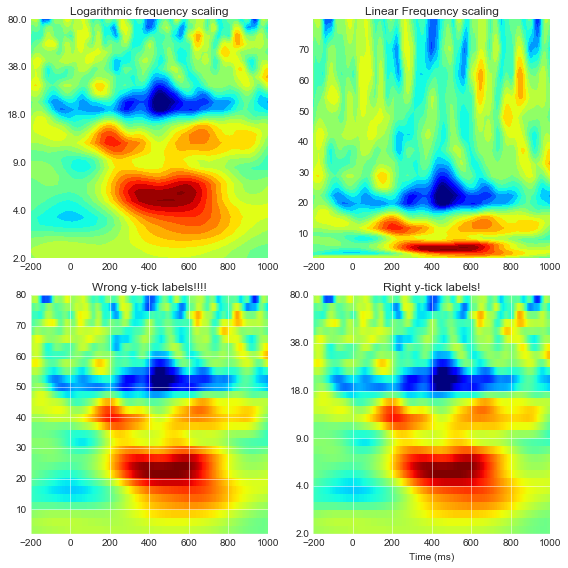

In [24]:
plt.figure(figsize=[8,8])

ax=plt.subplot(221)
ax.set_yscale("log")
    
plt.contourf(EEGtimes, frex, eegpower, 40,
            vmin=-3,vmax=3,
            cmap=plt.cm.jet,
            origin = "lower",
            )
ax.set_yticks(np.logspace(log10(min_freq),log10(max_freq),6))
ax.set_yticklabels(np.round(np.logspace(log10(min_freq),log10(max_freq),6)))
ax.set_xlim([-200,1000])
plt.title("Logarithmic frequency scaling")

ax=plt.subplot(222)
    
plt.contourf(EEGtimes,frex, eegpower, 40,
            vmin=-3,vmax=3,
            cmap=plt.cm.jet,
            origin = "lower",
            )
ax.set_xlim([-200,1000])
plt.title("Linear Frequency scaling")

ax=plt.subplot(223)
    
plt.imshow(eegpower,
            vmin=-3,vmax=3,
            cmap=plt.cm.jet,
            origin = "lower",
            aspect = "auto",
            interpolation = "none",
            extent = [EEGtimes[0],EEGtimes[-1],min_freq,max_freq]
            )
ax.set_xlim([-200,1000])
plt.title("Wrong y-tick labels!!!!")


ax=plt.subplot(224)
ax.set_yscale("log")

plt.imshow(eegpower,
            vmin=-3,vmax=3,
            cmap=plt.cm.jet,
            origin = "lower",
            aspect = "auto",
            interpolation = "none",
            extent = [EEGtimes[0],EEGtimes[-1],min_freq,max_freq]
            )
ax.set_yticks(np.logspace(log10(min_freq),log10(max_freq),6))
ax.set_yticklabels(np.round(np.logspace(log10(min_freq),log10(max_freq),6)))
ax.set_xlim([-200,1000])
plt.title("Right y-tick labels!")
plt.xlabel("Time (ms)")

plt.tight_layout()

### Figure 13.12

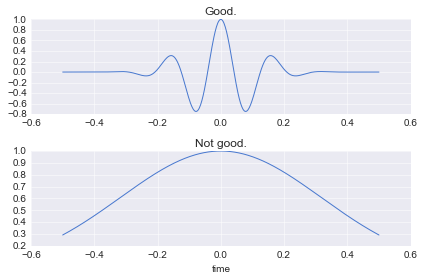

In [81]:
frequency = 6. #sine wave frequency
srate = 500. #sampling rate
time = np.arange(-.5,.5 + 1/srate,1/srate)

#create the wavelet
wavelet = exp(2*1j*pi*frequency*time) * exp(-time**2/(2*(4/(2*pi*frequency))**2))

plt.subplot(211)
plt.plot(time,np.real(wavelet))
plt.title("Good.")


#make a wavelet that is too short
tooLowFrequency = 2
wavelet = exp(2*1j*pi*tooLowFrequency) * exp(-time**2/(2*(4/(2*pi*tooLowFrequency))**2))


plt.subplot(212)
plt.plot(time,np.real(wavelet))
plt.xlabel("time")
plt.title("Not good.")

plt.tight_layout()

###Figure 13.13


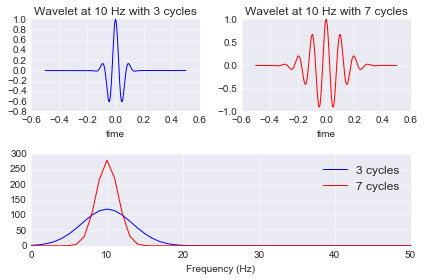

In [83]:
frequency = 10
time = np.arange(-0.5,0.5 + 1/srate,1/srate)
numcycles = [3,7]

wavecolors='br'

plt.figure()

for i,cycle in enumerate(numcycles):
    #create our wavelet
    wavelet = exp(2*1j*pi*frequency*time) * exp(-time**2/(2*(cycle/(2*pi*frequency))**2))
    
    plt.subplot(2,2,i+1)
    plt.plot(time,np.real(wavelet),wavecolors[i])
    plt.xlabel("time")
    plt.title("Wavelet at " + str(frequency) + " Hz with " + str(cycle) + " cycles")
    
    plt.subplot(2,1,2)
    fft_wav = 2*np.absolute(fft(wavelet))
    hz_wav = np.linspace(0,srate/2,np.round(len(wavelet)/2)+1)
    plt.plot(hz_wav,fft_wav[:len(hz_wav)],wavecolors[i])
    
plt.subplot(212)
plt.xlabel("Frequency (Hz)")
plt.xlim([0,50])
plt.legend([str(numcycles[0]) + " cycles", str(numcycles[1]) + " cycles"])

plt.tight_layout()

###Figure 13.14

Effect of varying number of cycles. To reproduce this figure, input the below standard deviations that define the width of Gaussians for Morlet wavelets.

In [84]:
# s =  3./(2*pi*frex)
# s = 10./(2*pi*frex)

###Figure 13.15

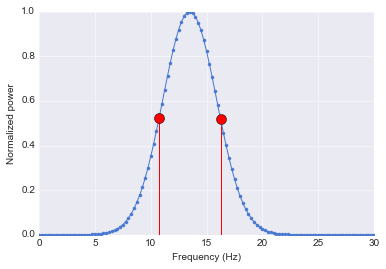

In [89]:
frex  = np.logspace(log10(2),log10(80),30)
srate = 500.
time = np.arange(-2,2+1/srate,1/srate)
N     = len(time)
hz    = np.linspace(0,srate/2,np.floor(N/2)+1)
fwhm  = np.zeros([3,len(frex)])

for numcyclesi in range(3):

    if numcyclesi == 0:
        numcycles = np.tile(3,[len(frex)]);
    elif numcyclesi == 1:
        numcycles = np.tile(10,[len(frex)]);
    elif numcyclesi == 2:
        numcycles = np.logspace(log10(3),log10(10),len(frex));

    for fi in range(len(frex)):
        
        #make wavelet
        wavelet = exp(2*1j*pi*frex[fi]*time) * exp(-time**2/(2*(numcycles[fi]/(2*pi*frex[fi]))**2))
        
        #take FFT of wavelet
        fwave = fft(wavelet)
        fwave = np.absolute(fwave[:len(hz)])*2
        
        #normalize power to [0,1]
        fwave -= np.min(fwave)
        fwave /= np.max(fwave)
        
        #find left and right 1/2
        peakx = np.argmax(fwave)
        left5 = np.argmin(np.absolute(fwave[:peakx]-0.5))
        right5 = np.argmin(np.absolute(fwave[peakx:]-0.5))
        right5 = right5 + peakx 
        
        fwhm[numcyclesi,fi] = hz[right5] - hz[left5]
        
        #plot one example of wavelet's power spectrum and fwhm
        if fi == np.ceil(len(frex)/2) and numcyclesi == 2:
            plt.figure()
            
            #plot power spectrum
            plt.plot(hz,fwave,'.-')
            
            #plot fwhm
            plt.plot(hz[left5],fwave[left5],'ro',markersize=10)
            plt.plot(hz[right5],fwave[right5],'ro',markersize=10)
            #draw lines to frequencies
            plt.vlines(hz[left5],0,fwave[left5],colors='r')
            plt.vlines(hz[right5],0,fwave[right5],colors='r')
            plt.xlim([0,30])
            plt.xlabel("Frequency (Hz)")
            plt.ylabel("Normalized power")
        

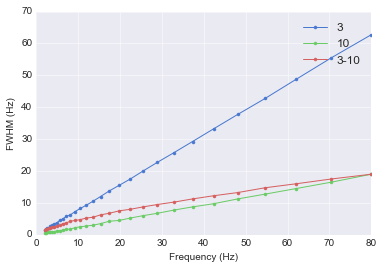

In [90]:
plt.figure()
plt.plot(frex,fwhm.T,'.-')
plt.xlabel("Frequency (Hz)")
plt.ylabel("FWHM (Hz)")
_=plt.legend(["3","10","3-10"])

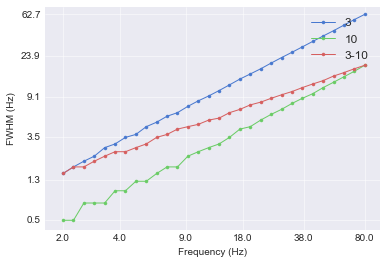

In [91]:
plt.figure()
ax=plt.subplot(111)
plt.plot(frex,fwhm.T,'.-')
# ax.set_xscale("log")
# ax.set_yscale("log")

# ax.set_xlim([frex[0]*.8, frex[-1]*1.2])
# ax.set_ylim([np.min(fwhm)*.8, np.max(fwhm)*1.2])
# ax.set_xticks(np.logspace(log10(min_freq),log10(max_freq),6))


# ax.set_yticklabels(np.round(np.logspace(log10(min_freq),log10(max_freq),6)))
plt.xlabel("Frequency (Hz)")
plt.ylabel("FWHM (Hz)")
_=plt.legend(["3","10","3-10"])


_=plt.setp(ax,'xlim',[frex[0]*.8, frex[-1]*1.2],
         'ylim',[np.min(fwhm)*.8, np.max(fwhm)*1.2],
         'xscale','log',
         'xticks',np.round(np.logspace(log10(frex[0]),log10(frex[-1]),6)),
         'xticklabels',np.round(np.logspace(log10(frex[0]),log10(frex[-1]),6)),
         'yscale','log',
         'yticks',np.round(10*np.logspace(log10(np.min(fwhm)),log10(np.max(fwhm)),6))/10,
         'yticklabels', np.round(10*np.logspace(log10(np.min(fwhm)),log10(np.max(fwhm)),6))/10)
